<a href="https://colab.research.google.com/github/harishmuh/Deep-Learning_study/blob/main/CNN_Handwritten_digit_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

---
# **Convolutional Neural Network - Handwritten digit MNIST**

---

![image](https://ludwig.ai/latest/examples/mnist_colab_notebooks/images/mnist_sample_digits.png)

**Context**

 In [the previous work](https://github.com/harishmuh/Deep-Learning_study/blob/main/MLP_Handwritten_digits_dataset.ipynb), we have built the neural network with MPL. In this study, we will build a Convolutional Neural Network (CNN) to classify handwritten digits.

 **Convolutional Neural Network (CNN)**


 A Convolutional Neural Network (CNN) is a type of deep neural network designed primarily for processing grid-structured data such as images. It uses convolutional layers to automatically extract spatial features (e.g., edges, textures, shapes) through local connections and shared weights, making it more efficient than fully connected networks for visual tasks.



**About MNIST dataset**

![eight](https://user-images.githubusercontent.com/51207580/59979373-bc052480-9604-11e9-85b8-464367fdc891.png)


**Dataset Characteristics**

* 70,000 grayscale images

    * 60,000 training images

    * 10,000 test images

* Image size: 28 × 28 pixels (784 total pixels)

* Pixel range: 0–255

Each image is labeled with its corresponding digit.

**Importing libraries**

In [1]:
# Importing libraries
import tensorflow as tf # Deeplearning frame work
from tensorflow import keras # Model building
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

# style
plt.style.use('ggplot')

**Loading MNIST dataset**

In [2]:
# Loading dataset
mnist = keras.datasets.mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


**Checking data shape**

In [3]:
# Train data
X_train.shape

(60000, 28, 28)

In [4]:
# Test data
X_test.shape

(10000, 28, 28)

So we have 3D data. We have 60000 training data and 10000 testing data in 28 x 28 pixels.

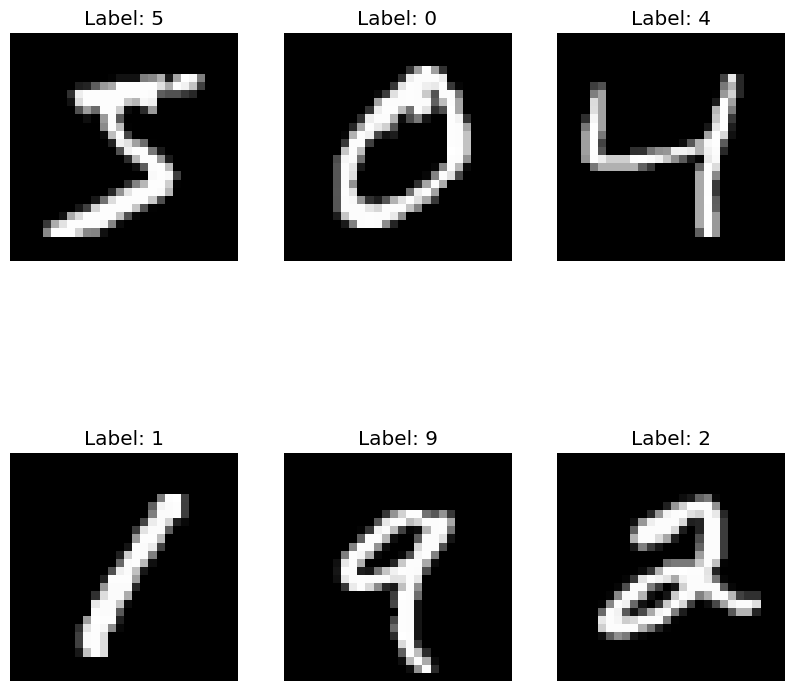

In [5]:
# Displaying six images
plt.figure(figsize=(10,10))
for i in range(6):
    plt.subplot(2,3,i+1)
    plt.imshow(X_train[i], cmap='gray')
    plt.title(f'Label: {y_train[i]}')
    plt.axis('off')
plt.show()

**Preprocessing data**

We can make the preprocessing data of neural network be easier by dividing the pixel with 255.

In [6]:
# Data Normalization (Pixels 0-255 into 0-1)
X_train = X_train / 255
X_test = X_test /255

**Reshaping**

Reshaping is conducted to meet the requirements of CNN (by adding more dimension channel). The CNN expects input shape:
>(batch_size,height,width,channels)

So we will transforms from

(60000,28,28)

to:

(60000,28,28,1)

In [7]:
# Reshaping data
X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)

**Model Building with CNN - Keras**

We will build CNN model with structure of
* **Conv2D Layer** : 32 filters (size 3x3) to extract initial features
* **MaxPooling2D** (2x2): to reduce dimension
* **2nd Conv2D Layer** : 64 filters to extract more complex features
* **2nd MaxPooling** : to simplify features
* **Flatten layer** : to convert data into 1-dimensional vector
* **Dense layer** (128 units, ReLU activation) as main hidden layer
* **Last dense layer** (10 units, softmax activation): to classify 10 numbers (0-9)


In [8]:
# Model Building
model = keras.Sequential([
    keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(28, 28, 1)), # Convolution
    keras.layers.MaxPooling2D((2,2)), # Pooling
    keras.layers.Conv2D(64, (3,3), activation='relu'), # Convolution
    keras.layers.MaxPooling2D((2,2)), # Pooling
    keras.layers.Flatten(), # Flattening
    keras.layers.Dense(128, activation='relu'), # Fully connected
    keras.layers.Dense(10, activation='softmax') # Output
])

**Model Compilation**

In [9]:
# Compiling model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [15]:
# Displaying model
model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 675,104 (2.58 MB)

 Trainable params: 225,034 (879.04 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 450,070 (1.72 MB)

**Model training**

In [10]:
# Training model
# Model will be training with 10 epoch (number of iteration of all dataset)
historyCNN = model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 54s 28ms/step - accuracy: 0.9097 - loss: 0.2887 - val_accuracy: 0.9838 - val_loss: 0.0505
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 51s 27ms/step - accuracy: 0.9856 - loss: 0.0464 - val_accuracy: 0.9861 - val_loss: 0.0405
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 51s 27ms/step - accuracy: 0.9912 - loss: 0.0279 - val_accuracy: 0.9898 - val_loss: 0.0297
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 51s 27ms/step - accuracy: 0.9936 - loss: 0.0192 - val_accuracy: 0.9888 - val_loss: 0.0313
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 51s 27ms/step - accuracy: 0.9959 - loss: 0.0131 - val_accuracy: 0.9916 - val_loss: 0.0299
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 51s 27ms/step - accuracy: 0.9958 - loss: 0.0122 - val_accuracy: 0.9913 - val_loss: 0.0295
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 51s 27ms/step - accuracy: 0.9971 - loss: 0.0085 - val_accuracy: 0.9868 - val_loss: 0.0437
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 51s 27ms/step - accuracy: 0.9975 -

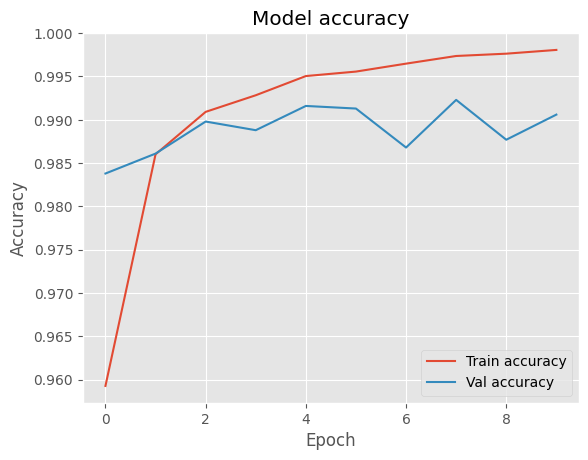

In [11]:
# Plotting accuracy
plt.plot(historyCNN.history['accuracy'])
plt.plot(historyCNN.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train accuracy', 'Val accuracy'], loc='lower right')
plt.show()

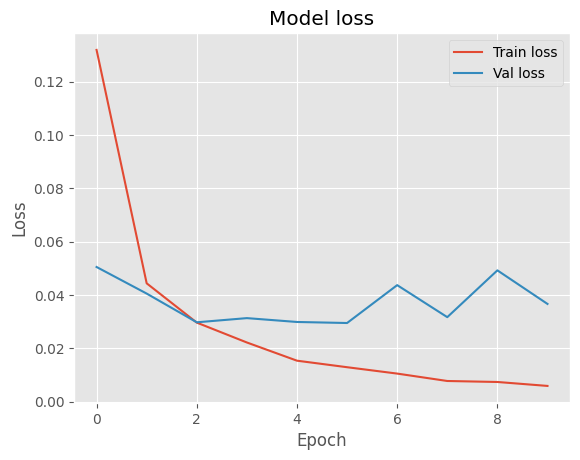

In [12]:
# Plotting loss
plt.plot(historyCNN.history['loss'])
plt.plot(historyCNN.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train loss', 'Val loss'], loc='upper right')
plt.show()

In [13]:
# Model Evaluation
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)
print('\nTest accuracy - CNN:', test_acc)

313/313 - 3s - 9ms/step - accuracy: 0.9906 - loss: 0.0366

Test accuracy - CNN: 0.9905999898910522


We get high accuracy of 99%.

**Prediction simulation**

Now, we want to check the prediction result by ourselves. We order the model to predict images from the test set.

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step


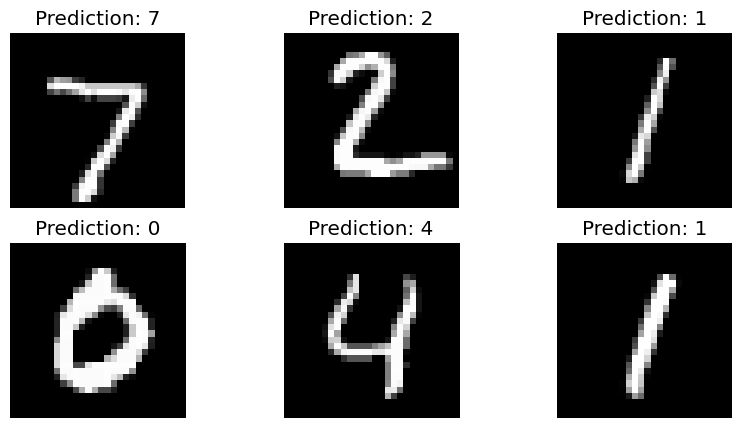

In [14]:
# Prediction simulation
prediction = model.predict(X_test)
#prediction[0]

# Displaying prediction
plt.figure(figsize=(10,5))
for i in range(6):
  plt.subplot(2,3,i+1)
  plt.imshow(X_test[i], cmap='gray')
  plt.title(f'Prediction: {np.argmax(prediction[i])}')
  plt.axis('off')
plt.show()

The prediction result is quite accurate.

**Conclusion**

The CNN model demonstrates 99% accuracy on the MNIST handwritten dataset, achieving high performance with minimal generalization gap.